In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df=pd.read_csv('C:\Ashwin\Learning\Workspace\Workspace\Ashwin space\Machine Learning\Life_Expectancy.csv')
df.columns.str.replace(' ','')

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [128]:
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [73]:
#Data preprocessing
df['Status_cat']=pd.get_dummies(df['Status'],drop_first=True)

In [77]:
input_cols=df.drop(['Country','Status','Expected'],axis=1)
target_cols=df['Expected']

(array([11.,  6., 17., 15.,  3.,  2.,  1., 28., 32.,  9.]),
 array([ 2.1 ,  9.03, 15.96, 22.89, 29.82, 36.75, 43.68, 50.61, 57.54,
        64.47, 71.4 ]),
 <BarContainer object of 10 artists>)

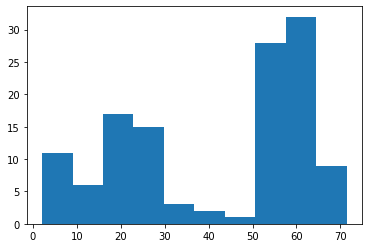

In [130]:
plt.hist(df[' BMI '])

In [89]:
input_cols.head()

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Status_cat
0,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,1
1,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,1
2,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,1
3,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,1
4,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,1


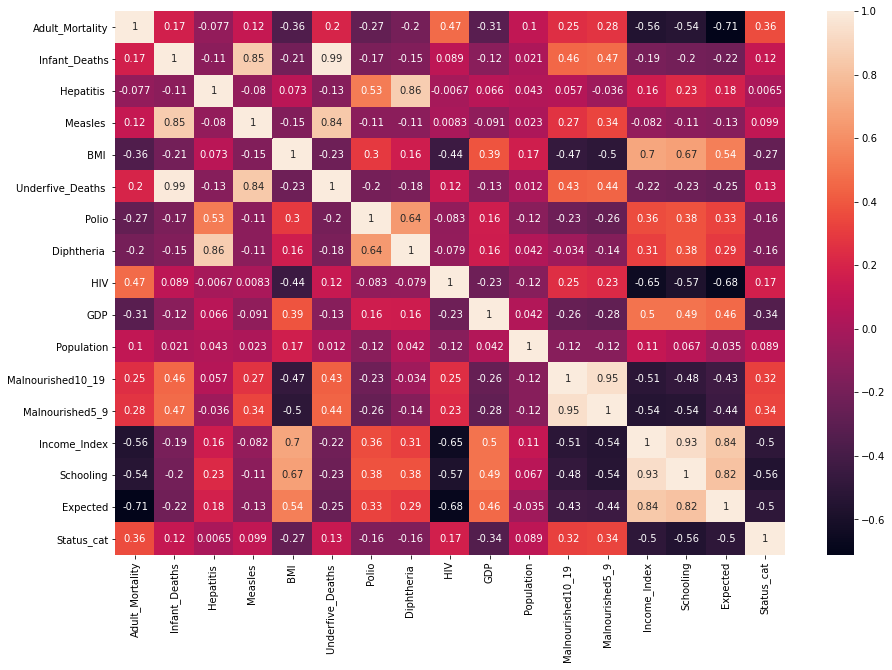

In [100]:
fig_dims = (15,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(),annot=True)
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
train_x,validate_x,train_y,validate_y=train_test_split(input_cols,
                                                       target_cols,
                                                       test_size=0.2,random_state=1)
train_x.shape,validate_x.shape,train_y.shape,validate_y.shape

((99, 16), (25, 16), (99,), (25,))

In [79]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler().fit(train_x)
train_x_scaled=scalar.transform(train_x)
validate_x_scalar=scalar.transform(validate_x)

In [90]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler().fit(train_x)
train_x_scaled=minmax.transform(train_x)
validate_x_scalar=minmax.transform(validate_x)

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [91]:
from sklearn.metrics import mean_squared_error
linear_model=LinearRegression().fit(train_x,train_y)
validate_y_pred=linear_model.predict(validate_x)
rmse=mean_squared_error(validate_y,validate_y_pred,squared=False)
print('RMSE:',rmse)
r2=linear_model.score(train_x,train_y)
print('R-square',r2)

RMSE: 4.900964423636511
R-square 0.8700938682525771


In [92]:
dt_model=DecisionTreeRegressor(max_depth=5,random_state=1).fit(train_x,train_y)
validate_y_pred=dt_model.predict(validate_x)
rmse=mean_squared_error(validate_y,validate_y_pred,squared=False)
print('RMSE:',rmse)
r2=dt_model.score(train_x,train_y)
print('R-square',r2)

RMSE: 3.8078894726752655
R-square 0.9829430010239523


In [93]:
rf_model=RandomForestRegressor(max_depth=6,random_state=1).fit(train_x,train_y)
validate_y_pred=rf_model.predict(validate_x)
rmse=mean_squared_error(validate_y,validate_y_pred,squared=False)
print('RMSE:',rmse)
r2=rf_model.score(train_x,train_y)
print('R-square',r2)

RMSE: 2.832081445063597
R-square 0.9792668805715202


In [61]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [94]:
ridge=Ridge(alpha = 1)
ridge_model = ridge.fit(train_x,train_y)
validate_y_pred=ridge_model.predict(validate_x)
rmse=mean_squared_error(validate_y,validate_y_pred,squared=False)
print('RMSE:',rmse)
r2=ridge_model.score(train_x,train_y)
print('R-square',r2)

RMSE: 5.119291348226904
R-square 0.8656715418162334


C:\Ashwin\Learning\Datascience\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.29685e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [95]:
lasso = Lasso(alpha = 0.5)
lasso_model = lasso.fit(train_x,train_y)
validate_y_pred=lasso_model.predict(validate_x)
rmse=mean_squared_error(validate_y,validate_y_pred,squared=False)
print('RMSE:',rmse)
r2=lasso_model.score(train_x,train_y)
print('R-square',r2)

RMSE: 5.505076465956118
R-square 0.857978632359522


C:\Ashwin\Learning\Datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 407.1695399224297, tolerance: 0.6941809090909091
  model = cd_fast.enet_coordinate_descent(


In [86]:
import statsmodels.api as sm
model=sm.OLS(train_y,train_x_scaled)
results=model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.179
Method:                 Least Squares   F-statistic:                            0.06163
Date:                Mon, 29 Nov 2021   Prob (F-statistic):                        1.00
Time:                        17:08:35   Log-Likelihood:                         -563.40
No. Observations:                  99   AIC:                                      1159.
Df Residuals:                      83   BIC:                                      1200.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------